In [ ]:
import fastf1
import pandas as pd
from scipy import signal
import numpy as np

In [ ]:
session = fastf1.get_session(2023, "Azerbaijan Grand Prix", "R")
session.load()

In [18]:
lap = session.laps.loc[session.laps.index == 182]

In [ ]:
lap

In [20]:
pos_data = lap.get_pos_data()
pos_data = pos_data["X"]
pos_data /= 10

In [21]:
pos_data = pos_data.to_numpy()

In [22]:
def plot(pos_data, window_length, polyorder):
    smooth = signal.savgol_filter(pos_data, window_length=window_length, polyorder=polyorder, mode="nearest")
    smooth = pd.DataFrame(smooth)
    smooth.plot()

<Axes: >

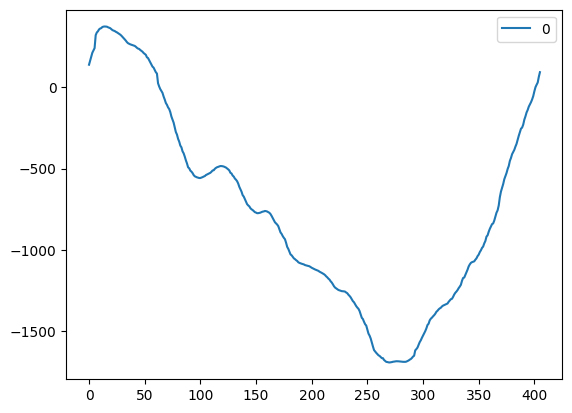

In [36]:
raw = pd.DataFrame(pos_data)
raw.plot()

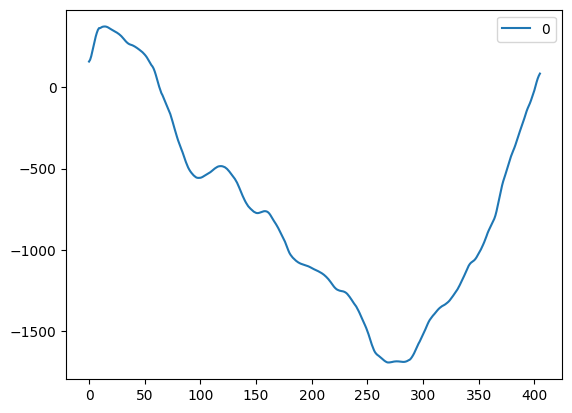

In [37]:
plot(pos_data, window_length=10, polyorder=2)

In [41]:
pd.DataFrame(pos_data)

,0
0,137.3
1,162.0
2,186.6
3,211.2
4,225.9
...,...
401,-0.7
402,14.4
403,27.7
404,62.8


In [38]:
smooth = signal.savgol_filter(pos_data, window_length=10, polyorder=2, mode="nearest")
smooth = pd.DataFrame(smooth)
smooth

,0
0,156.532500
1,167.838125
2,189.797500
3,219.648125
4,251.687500
...,...
401,5.068125
402,30.053750
403,52.070625
404,69.403125


In [42]:
signal.savgol_coeffs(window_length=10, polyorder=2)

array([-0.0875 ,  0.0375 ,  0.13125,  0.19375,  0.225  ,  0.225  ,
        0.19375,  0.13125,  0.0375 , -0.0875 ])